In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

In [ ]:
ts = df['Passengers']
print(ts.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


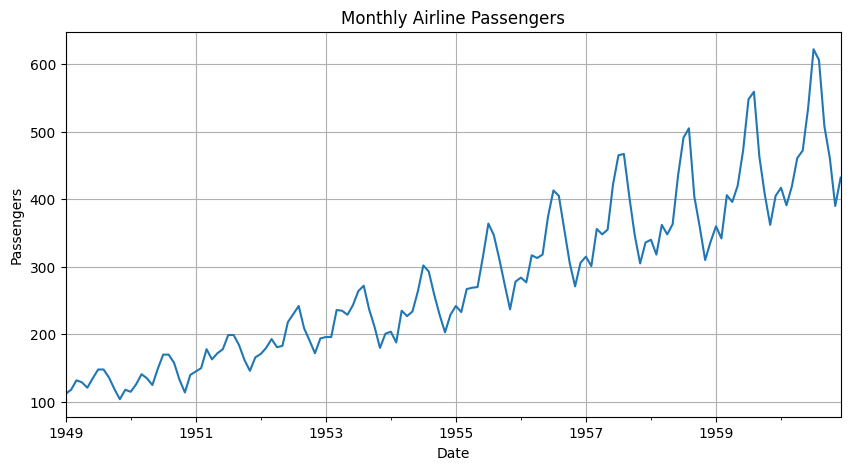

In [ ]:
ts.plot(title="Monthly Airline Passengers", figsize=(10,5))
plt.ylabel("Passengers")
plt.xlabel("Date")
plt.grid(True)
plt.show()

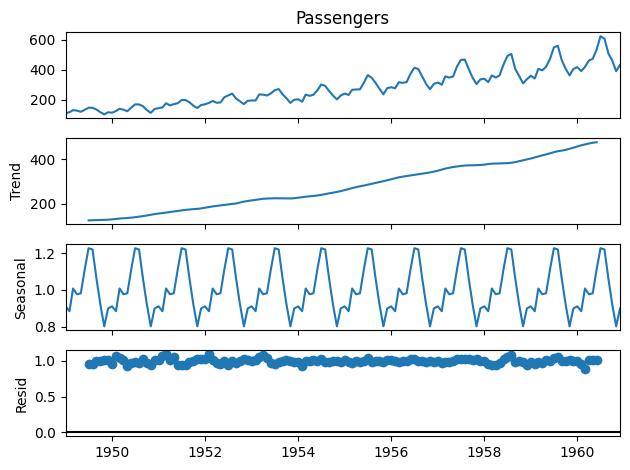

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts, model='multiplicative')
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


Statistic value should be large negative to be called stationary.

p-value should be less than 0.05 to reject the null hypothesis which states that the time series is not stationary. In this case we accept the null hypothesis.

In [ ]:
adf_result

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

### Making the ts stationary

removes the trend and stabilizes the mean.

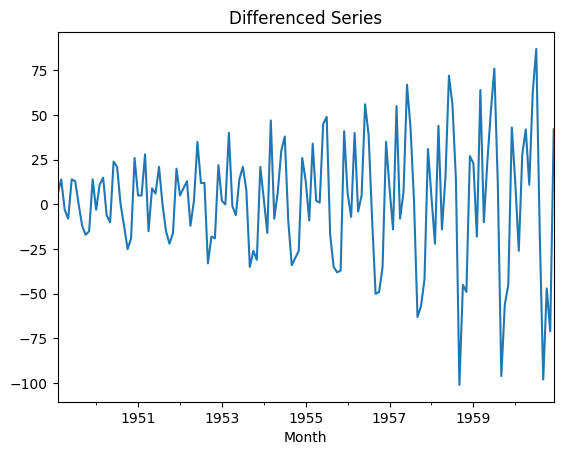

In [ ]:
ts_diff = ts.diff().dropna()
ts_diff.plot(title="Differenced Series")
plt.show()

Rechecking for stationarity after first order differencing:

In [ ]:
adf_result2 = adfuller(ts_diff)
print(f"ADF Statistic: {adf_result2[0]}")
print(f"p-value: {adf_result2[1]}")

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(1,1,1))  # p, d, q
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Thu, 01 May 2025   AIC                           1394.683
Time:                        08:26:52   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

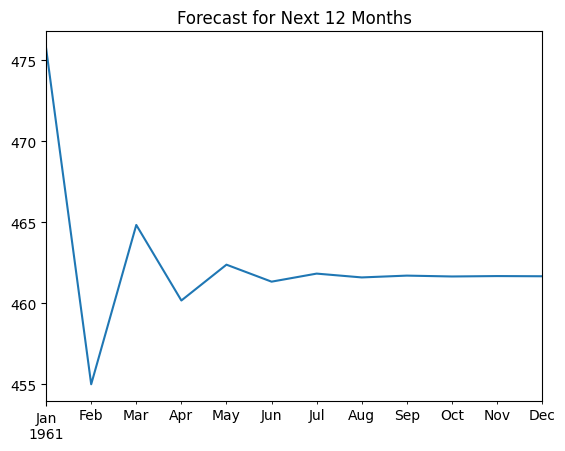

In [ ]:
forecast = model_fit.forecast(steps=12)
forecast.plot(title="Forecast for Next 12 Months")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
actual = ts[-12:]  # last 12 values
predicted = model_fit.predict(start=len(ts)-12, end=len(ts)-1)
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE: {rmse:.2f}")

RMSE: 49.58
